In [47]:
# Neccesary import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


In [48]:
# Number of rows and columns to display
file1Path = '../data/datasets/akakceProducts.csv'
file2Path = '../data/datasets/cimriProducts.csv'

df1 = pd.read_csv(file1Path)
df2 = pd.read_csv(file2Path)

##concat two dataframes with dropping the header row of the 2nd dataframe
df = pd.concat([df1, df2], ignore_index=True)

row , col = df.shape
print("Number of rows: ", row)
print("Number of columns: ", col)


Number of rows:  445
Number of columns:  6


In [49]:
# Showing the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   445 non-null    object
 1   Current Date   445 non-null    object
 2   Current Price  445 non-null    int64 
 3   Old Date       445 non-null    object
 4   Old Price      445 non-null    int64 
 5   Category       445 non-null    object
dtypes: int64(2), object(4)
memory usage: 21.0+ KB


In [50]:
# Checking the missing values if there is any
df.isnull().sum()

Product Name     0
Current Date     0
Current Price    0
Old Date         0
Old Price        0
Category         0
dtype: int64

In [51]:
# Filtering the duplicated rows and printing the head of the dataframe

duplicates = df.duplicated()
numDuplicates = duplicates.sum()

print("Number of duplicated rows: ", numDuplicates)

Number of duplicated rows:  21


In [52]:
# Dropping the duplicated rows if there is any
# Printing the number of rows and columns after dropping the duplicated rows

wODuplicates = df[~duplicates]

rowUpdated, col = wODuplicates.shape

print("Number of rows after dropping the duplicated rows: ", rowUpdated)
print("Number of columns after dropping the duplicated rows: ", col)
print("Number of rows dropped: ", row - rowUpdated)

Number of rows after dropping the duplicated rows:  424
Number of columns after dropping the duplicated rows:  6
Number of rows dropped:  21


In [53]:
# Double checking if there is any duplicated rows

doubleCheckDf = wODuplicates.duplicated()
numDoubleCheck = doubleCheckDf.sum()

print("After double checking, number of duplicated rows: ", numDoubleCheck)

After double checking, number of duplicated rows:  0


In [54]:
# Converting the date columns to datetime format
# Calculating the difference between the current date and the old date
# Adding a new column to the dataframe which is the difference between the current date and the old date

df = wODuplicates

df['Current Date'] = pd.to_datetime(df['Current Date'], dayfirst=True)
df['Old Date'] = pd.to_datetime(df['Old Date'], dayfirst=True)

df['Days Passed'] = (df['Current Date'] - df['Old Date']).dt.days

In [55]:
# After cleaning the dataset, Exploring the dataset

df.head()

,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed
0,SteelSeries Rival 3 RGB Kablolu Optik Oyuncu M...,2023-06-10,600,2022-06-10,289,mouse,365
1,SteelSeries Rival 5 RGB Kablolu Optik Oyuncu M...,2023-06-10,1199,2022-06-10,629,mouse,365
2,Pro Plan Sterilised Somonlu ve Ton Balıklı 10 ...,2023-06-10,1619,2022-06-10,760,kedi-mamasi,365
3,Nutella 750 gr Kakaolu Fındık Kreması,2023-06-10,95,2022-06-11,44,ezme-krem-cikolata,364
4,Royal Canin Sterilised 37 15 kg Kısırlaştırılm...,2023-06-10,1775,2022-06-10,975,kedi-mamasi,365


In [56]:
# Showing the statistical information of the dataset

df.describe()

,Current Date,Current Price,Old Date,Old Price,Days Passed
count,424,424.000000,424,424.000000,424.000000
mean,2023-06-09 06:47:32.830188800,2656.801887,2022-06-21 05:15:50.943396352,1839.313679,353.063679
min,2023-06-09 00:00:00,2.000000,2022-06-09 00:00:00,1.000000,39.000000
25%,2023-06-09 00:00:00,107.750000,2022-06-10 00:00:00,74.750000,359.000000
50%,2023-06-09 00:00:00,376.000000,2022-06-10 00:00:00,259.000000,364.000000
75%,2023-06-10 00:00:00,1634.750000,2022-06-15 00:00:00,1149.000000,365.000000
max,2023-06-10 00:00:00,49849.000000,2023-05-02 00:00:00,31329.000000,365.000000
std,NaN,5973.177317,NaN,3989.107391,37.530233


In [57]:
# Creating a new column named "Price Increase Rate" and calculating the price increase rate
# AND
# Showing the statistical information of the dataset

df['Price Increase Percentage'] = (df['Current Price'] - df['Old Price']) / df['Current Price'] * 100

df.describe()

,Current Date,Current Price,Old Date,Old Price,Days Passed,Price Increase Percentage
count,424,424.000000,424,424.000000,424.000000,424.000000
mean,2023-06-09 06:47:32.830188800,2656.801887,2022-06-21 05:15:50.943396352,1839.313679,353.063679,27.341911
min,2023-06-09 00:00:00,2.000000,2022-06-09 00:00:00,1.000000,39.000000,-75.145955
25%,2023-06-09 00:00:00,107.750000,2022-06-10 00:00:00,74.750000,359.000000,18.116650
50%,2023-06-09 00:00:00,376.000000,2022-06-10 00:00:00,259.000000,364.000000,31.084613
75%,2023-06-10 00:00:00,1634.750000,2022-06-15 00:00:00,1149.000000,365.000000,41.817688
max,2023-06-10 00:00:00,49849.000000,2023-05-02 00:00:00,31329.000000,365.000000,76.956522
std,NaN,5973.177317,NaN,3989.107391,37.530233,23.272023


In [58]:
# Creating a new dataframe named "df2"
# It will be sorted version of the "df" dataframe
# Sorting according to the "Current Price" column (descending order)
# Showing 3 products with the highest current price

df2 = df.sort_values(by=['Current Price'], ascending=False)

df2.head(3)

,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed,Price Increase Percentage
126,Apple iPhone 13 Pro Max 5G 128GB 6GB Ram 6.7 i...,2023-06-09,49849,2022-06-10,31329,cep-telefonlari,364,37.152200
142,Apple Macbook Pro MYD82TU-A M1 8GB Ram 256GB S...,2023-06-09,34999,2022-06-10,21380,dizustu-bilgisayar,364,38.912540
17,iPhone 13 128 GB Yıldız Işığı,2023-06-10,32999,2022-06-10,17799,cep-telefonu,365,46.062002


In [59]:
# Creating a new dataframe named "df3"
# It will be sorted version of the "df" dataframe
# Sorting according to the "Price Increase Percentage" column (descending order)
# Showing 3 products with the highest price increase percentage

df3 = df.sort_values(by=['Price Increase Percentage'], ascending=False)

df3.head(3)


,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed,Price Increase Percentage
241,Xiaomi 20000 mAh 2.1A - 3A Çift Çıkışlı Taşına...,2023-06-09,690,2022-06-10,159,tasinabilir-sarj-cihazi-powerbank,364,76.956522
411,HP 106A-W1106A Orjinal Toner,2023-06-09,410,2022-06-11,108,tonerler,363,73.658537
260,Assassins Creed III Special Edition PC,2023-06-09,323,2022-06-22,89,bilgisayar-oyunlari,352,72.445820


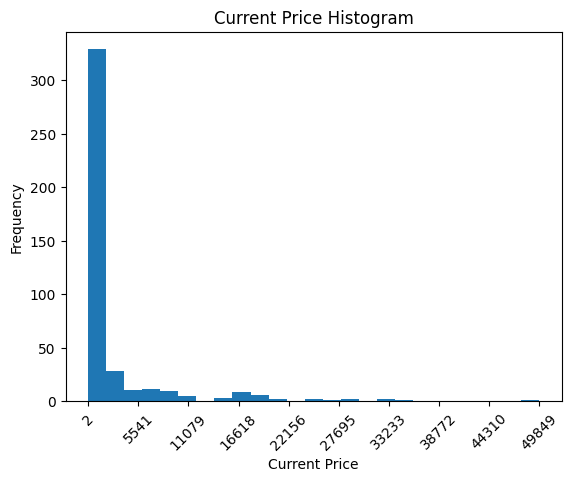

In [60]:
# Creating a histogram for the "Current Price" column with bins=25

plt.hist(df['Current Price'], bins=25)
plt.title("Current Price Histogram")
plt.xlabel("Current Price")
plt.ylabel("Frequency")
tick_positions = np.linspace(df['Current Price'].min(), df['Current Price'].max(), 10)
plt.xticks(rotation=45)
plt.xticks(tick_positions)

plt.show()

In [61]:
# Showing the statistical information of the "Current Price" column
print(df['Current Price'].describe())

count      424.000000
mean      2656.801887
std       5973.177317
min          2.000000
25%        107.750000
50%        376.000000
75%       1634.750000
max      49849.000000
Name: Current Price, dtype: float64


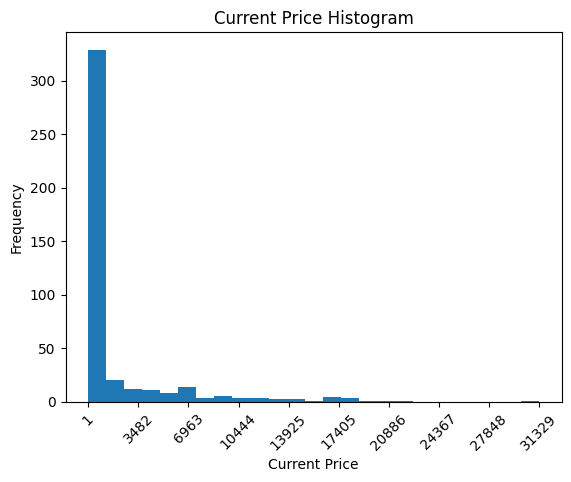

In [62]:
# Creating a histogram for the "Old Price" column with bins=25

plt.hist(df['Old Price'], bins=25)
plt.title("Current Price Histogram")
plt.xlabel("Current Price")
plt.ylabel("Frequency")
tick_positions = np.linspace(df['Old Price'].min(), df['Old Price'].max(), 10)
plt.xticks(rotation=45)
plt.xticks(tick_positions)

plt.show()

In [63]:
# Showing the statistical information of the "Old Price" column
print(df['Old Price'].describe())

count      424.000000
mean      1839.313679
std       3989.107391
min          1.000000
25%         74.750000
50%        259.000000
75%       1149.000000
max      31329.000000
Name: Old Price, dtype: float64


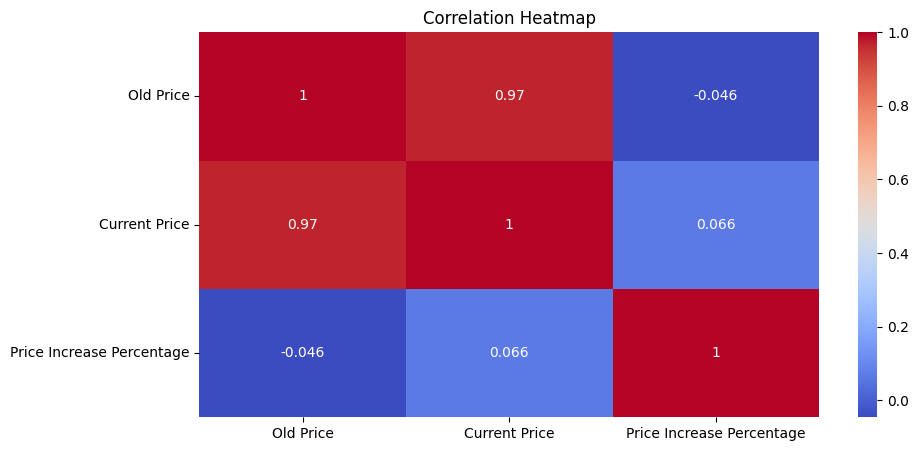

In [64]:
# Plotting the Correlation Heatmap
# to see if there is any strong correlation between the columns

plt.figure(figsize=(10, 5))
sns.heatmap(df[['Old Price', 'Current Price', 'Price Increase Percentage']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


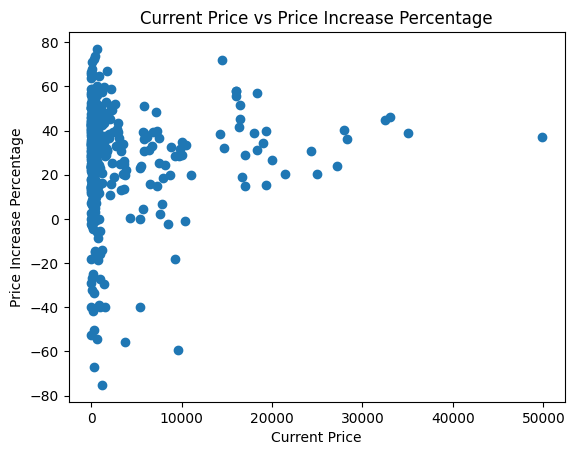

In [65]:
# Plotting the relationship between the "Current Price" and "Price Increase Percentage" columns

plt.scatter(df['Current Price'], df['Price Increase Percentage'])

plt.title("Current Price vs Price Increase Percentage")
plt.xlabel("Current Price")
plt.ylabel("Price Increase Percentage")

plt.show()

In [66]:
# Creating a new column named "Price Increase Status"
# If the price increase percentage is below 0, it will be "Decreased"
# If the price increase percentage is between 0 and 5, it will be "Stable"
# If the price increase percentage is between 5 and 30, it will be "Increased"
# If the price increase percentage is between 30 and 50, it will be "Highly Increased"
# If the price increase percentage is above 50, it will be "Extremely Increased"

# Showing the head of the dataframe

def priceIncreaseStatus(priceIncreasePercentage):
    if priceIncreasePercentage < 0:
        return "Decreased"
    elif priceIncreasePercentage >= 0 and priceIncreasePercentage < 5:
        return "Stable"
    elif priceIncreasePercentage >= 5 and priceIncreasePercentage < 30:
        return "Increased"
    elif priceIncreasePercentage >= 30 and priceIncreasePercentage < 50:
        return "Highly Increased"
    else:
        return "Extremely Increased"
    
df['Price Increase Status'] = df['Price Increase Percentage'].apply(priceIncreaseStatus)

df.head()

,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed,Price Increase Percentage,Price Increase Status
0,SteelSeries Rival 3 RGB Kablolu Optik Oyuncu M...,2023-06-10,600,2022-06-10,289,mouse,365,51.833333,Extremely Increased
1,SteelSeries Rival 5 RGB Kablolu Optik Oyuncu M...,2023-06-10,1199,2022-06-10,629,mouse,365,47.539616,Highly Increased
2,Pro Plan Sterilised Somonlu ve Ton Balıklı 10 ...,2023-06-10,1619,2022-06-10,760,kedi-mamasi,365,53.057443,Extremely Increased
3,Nutella 750 gr Kakaolu Fındık Kreması,2023-06-10,95,2022-06-11,44,ezme-krem-cikolata,364,53.684211,Extremely Increased
4,Royal Canin Sterilised 37 15 kg Kısırlaştırılm...,2023-06-10,1775,2022-06-10,975,kedi-mamasi,365,45.070423,Highly Increased


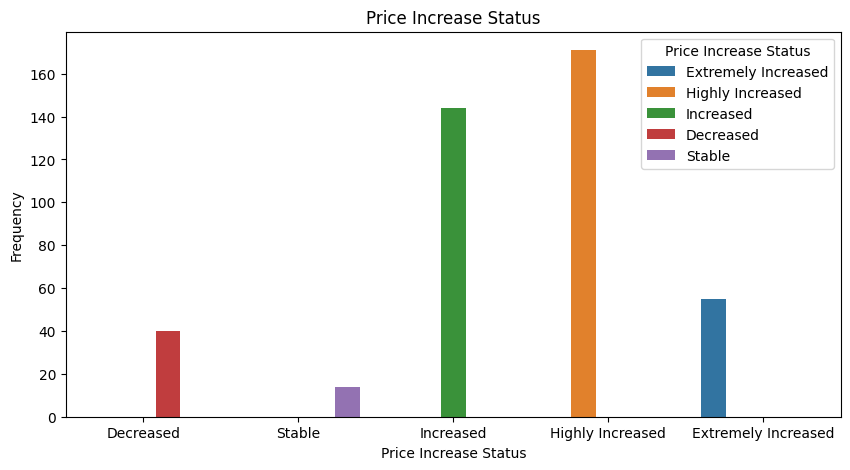

In [67]:
# Visualizing the "Price Increase Status" column with a bar plot

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Price Increase Status', hue='Price Increase Status', order = ['Decreased', 'Stable', 'Increased', 'Highly Increased', 'Extremely Increased'])
plt.title("Price Increase Status")
plt.xlabel("Price Increase Status")
plt.ylabel("Frequency")

plt.show()

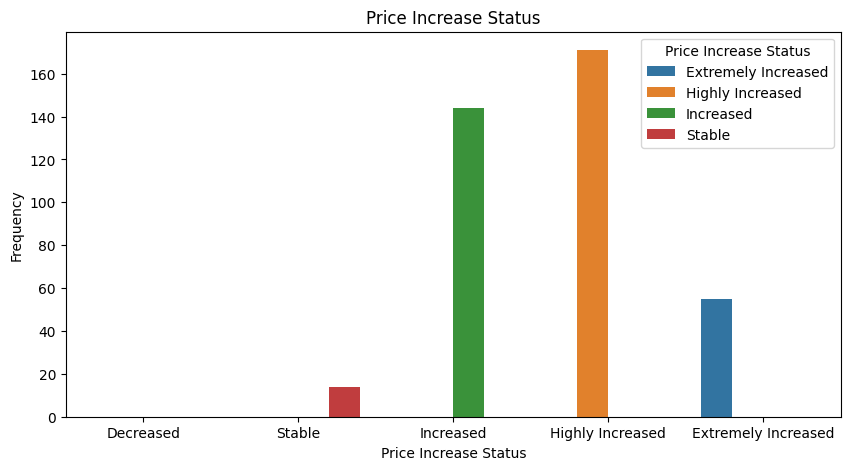

In [68]:
## Check if there is negative price increase percentage
## if there is any, drop it since it is impossible to have negative price increase percentage in Turkey's circumstances


df = df.drop(df[df['Price Increase Percentage'] < 0].index)

# Visualizing the "Price Increase Status" after dropping the negative price increase percentage
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Price Increase Status', hue='Price Increase Status', order = ['Decreased', 'Stable', 'Increased', 'Highly Increased', 'Extremely Increased'])
plt.title("Price Increase Status")
plt.xlabel("Price Increase Status")
plt.ylabel("Frequency")

plt.show()

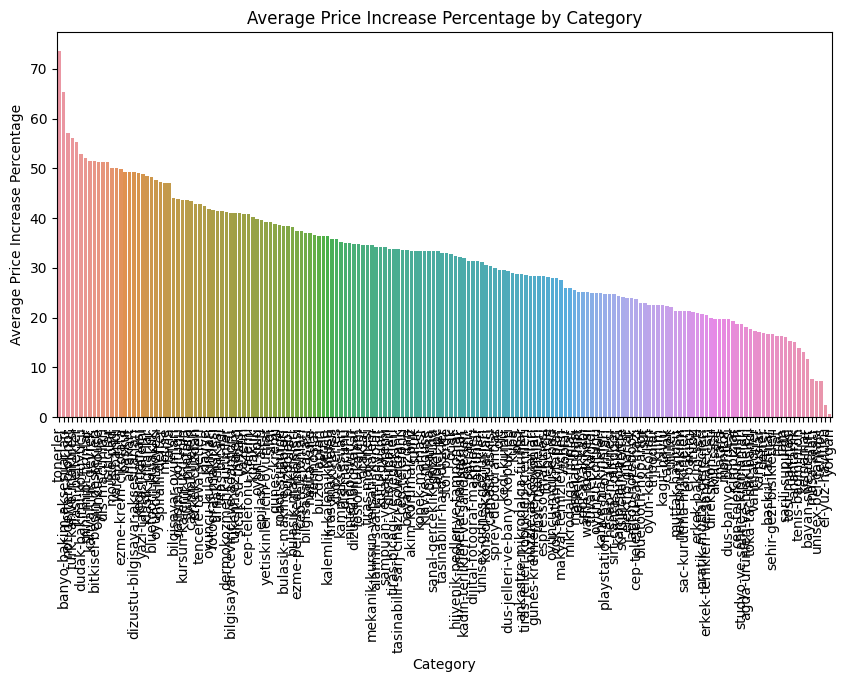

In [69]:
# Clustering the products according to their categories and showing the average price increase percentage for each category
# Plot the correlation between category and price increase percentage

avg_price_increase_by_category = df.groupby('Category')['Price Increase Percentage'].mean()
avg_price_increase_by_category = avg_price_increase_by_category.reset_index()
# Sort the df for better readability
avg_price_increase_by_category = avg_price_increase_by_category.sort_values(by='Price Increase Percentage', ascending=False)


# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Price Increase Percentage', data=avg_price_increase_by_category)
plt.title('Average Price Increase Percentage by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Average Price Increase Percentage')
plt.show()


In [70]:
# Do the same thing with interactive plot

fig = px.scatter(avg_price_increase_by_category, x='Category', y='Price Increase Percentage', color='Category')
fig.show()


In [71]:
# Calculating the enflation according to the dataset that we have


def inflationCalculator(df):
    # Calculating the average price increase percentage
    avgPriceIncreasePercentage = df['Price Increase Percentage'].mean()

    print("Average Price Increase Percentage: ", avgPriceIncreasePercentage)
    
    # Calculating the inflation
    inflation = avgPriceIncreasePercentage / 100 + 1  # 100 + 1 because the percentage is in the form of 1.05, 1.1, 1.15 etc.

    inflationPercentage = (inflation - 1) * 100
    
    # Returning the inflation
    return inflationPercentage

print("Inflation: ", inflationCalculator(df))

print(df.head(30))

Average Price Increase Percentage:  32.82201087548103
Inflation:  32.82201087548102
                                         Product Name Current Date   
0   SteelSeries Rival 3 RGB Kablolu Optik Oyuncu M...   2023-06-10  \
1   SteelSeries Rival 5 RGB Kablolu Optik Oyuncu M...   2023-06-10   
2   Pro Plan Sterilised Somonlu ve Ton Balıklı 10 ...   2023-06-10   
3               Nutella 750 gr Kakaolu Fındık Kreması   2023-06-10   
4   Royal Canin Sterilised 37 15 kg Kısırlaştırılm...   2023-06-10   
5   N&D Ancestral Grain Düşük Tahıllı Medium & Max...   2023-06-10   
6           Familia Plus 3 Katlı 32'li Tuvalet Kağıdı   2023-06-10   
7                              Solo 12'li Kağıt Havlu   2023-06-10   
8   Hawk Gaming Chair Fab V4 Siyah Kumaş Oyuncu Ko...   2023-06-10   
9   Fairy Platinum Limon Bulaşık Makinesi Kapsülü ...   2023-06-10   
10       Econature Kuzulu 15 kg Yetişkin Köpek Maması   2023-06-10   
11                                   iPhone 13 128 GB   2023-06-10   
12  Tu